In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from SimpleProcess import SimpleProcess
from dataload import dataload
import matplotlib.pyplot as plt
import numpy
import cv2
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


load image......


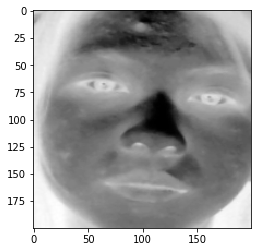

(200, 200)


In [2]:
image_paths = list(paths.list_images('./pre_img'))

sp = SimpleProcess(200,200)

dl = dataload(process=[sp])

(data,labels) = dl.load(image_paths)

plt.imshow(data[48],cmap=plt.cm.binary)
plt.show()
print(data[80].shape)

In [3]:
train_x,test_x,train_y,test_y = train_test_split(data,labels,test_size=0.1)
train_x = train_x.reshape((270, 200, 200, 1)) # Reshape an image to [1, 28 * 28]
train_x = train_x.astype("float32") / 255 # Scale to [0, 1]

test_x = test_x.reshape((30, 200, 200, 1)) # Reshape an image to [1, 28 * 28]
test_x = test_x.astype("float32") / 255 # Scale to [0, 1]

#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

#print(train_y)
#from keras.utils import to_categorical

#train_y = to_categorical(train_y)
#test_y = to_categorical(test_y)
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.transform(test_y)
print(len(train_x))

270


In [4]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras import backend as K

In [5]:
classes = 10 # so ng phan biet dien o day
model = Sequential()
model.add(Conv2D(20, (3, 3), padding='same', input_shape=(200,200,1)))
model.add(Activation('relu'))
model.add(Conv2D(20, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
          
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Second set of CONV => RELU => POOL layers
model.add(Conv2D(50, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(50, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
          
          
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# First (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))

# Softmax classifier
model.add(Dense(classes))
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 20)      200       
_________________________________________________________________
activation_1 (Activation)    (None, 200, 200, 20)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 20)      3620      
_________________________________________________________________
activation_2 (Activation)    (None, 200, 200, 20)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 20)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 32)      5792      
_________________________________________________________________
acti

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_x, train_y,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(test_x, test_y))

model.save('3_model_data.h5')

Instructions for updating:
Use tf.cast instead.
Train on 270 samples, validate on 30 samples
Epoch 1/10
270/270 [==============================] - 34s 127ms/step - loss: 2.3133 - acc: 0.1407 - val_loss: 2.2747 - val_acc: 0.0667
Epoch 2/10
270/270 [==============================] - 36s 133ms/step - loss: 2.0826 - acc: 0.2778 - val_loss: 1.4584 - val_acc: 0.4333
Epoch 3/10
270/270 [==============================] - 35s 130ms/step - loss: 1.1592 - acc: 0.5667 - val_loss: 0.3067 - val_acc: 0.9333
Epoch 4/10
270/270 [==============================] - 35s 129ms/step - loss: 0.4026 - acc: 0.8704 - val_loss: 0.2690 - val_acc: 0.9000
Epoch 5/10
270/270 [==============================] - 42s 157ms/step - loss: 0.1606 - acc: 0.9481 - val_loss: 0.0849 - val_acc: 0.9667
Epoch 6/10
270/270 [==============================] - 36s 133ms/step - loss: 0.0383 - acc: 0.9963 - val_loss: 0.0063 - val_acc: 1.0000
Epoch 7/10
270/270 [==============================] - 36s 134ms/step - loss: 0.0078 - acc: 0.9926